In [1]:
import numpy as np
import pandas as pd

# Текст

Мешок слов

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
vect = CountVectorizer(ngram_range=(1, 1))

In [4]:
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [5]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [6]:
vect = CountVectorizer(ngram_range=(1,2)) 

In [7]:
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [8]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

Дистанция между словами на случай опечаток

In [9]:
from scipy.spatial.distance import euclidean

In [10]:
vect = CountVectorizer(ngram_range=(3,3), analyzer='char_wb') 

In [11]:
n1, n2, n3, n4 = vect.fit_transform(['иванов', 'петров', 'петренко', 'смит']).toarray()

In [12]:
euclidean(n1, n2)

3.1622776601683795

# Изображения

Часто для задач, связанных с картинками, используется какая-нибудь сверточная сеть. Можно не придумывать архитектуру и не обучать сеть с нуля, а взять предобученную state of the art сеть, веса которой можно скачать из открытых источников. Чтобы адаптировать ее под свою задачу, дата сайнтисты практикуют т.н. fine tuning: последние полносвязные слои сети "отрываются", вместо них добавляются новые, подобранные под конкретную задачу, и сеть дообучается на новых данных. Но если вы хотите просто векторизовать изображение для каких-то своих целей (например, использовать какой-то несетевой классификатор) – просто оторвите последние слои и используйте выход предыдущих слоев:

![Описание картинки с котиком](20012ad648ebf0f8519b6465d9e9bda7.png)

In [13]:
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from scipy.misc import face

In [14]:
resnet_settings = {'include_top': False, 'weights': 'imagenet'}
resnet = ResNet50(**resnet_settings)

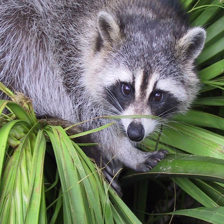

In [15]:
img = image.array_to_img(face())
img = img.resize((224, 224))
img

In [16]:
x = image.img_to_array(img)
x

array([[[122., 114., 134.],
        [141., 132., 155.],
        [124., 117., 134.],
        ...,
        [168., 168., 128.],
        [129., 139.,  89.],
        [120., 128.,  75.]],

       [[116., 114., 130.],
        [139., 136., 157.],
        [ 94.,  92., 108.],
        ...,
        [124., 135.,  84.],
        [ 99., 117.,  62.],
        [115., 133.,  75.]],

       [[ 92.,  92., 106.],
        [127., 126., 145.],
        [149., 147., 164.],
        ...,
        [102., 126.,  66.],
        [111., 135.,  77.],
        [ 87., 114.,  56.]],

       ...,

       [[114., 138.,  93.],
        [107., 129.,  78.],
        [125., 155.,  83.],
        ...,
        [112., 156., 102.],
        [115., 158., 106.],
        [116., 157., 101.]],

       [[104., 125.,  89.],
        [112., 132.,  84.],
        [128., 156.,  80.],
        ...,
        [115., 158., 105.],
        [117., 158., 104.],
        [118., 158.,  99.]],

       [[107., 123.,  92.],
        [124., 139.,  94.],
        [134., 1

In [17]:
x = np.expand_dims(x, axis=0)
# нужно дополнительное измерение, т.к. модель рассчитана на работу с массивом изображений

In [18]:
features = resnet.predict(x)

### Картинка с текстом

In [29]:
!pip install pytesseract

You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [30]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

In [31]:
img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'

In [32]:
img = requests.get(img)

In [33]:
img = Image.open(BytesIO(img.content))

In [34]:
text = pytesseract.image_to_string(img)
text

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

# Геоданные

In [28]:
!pip install reverse_geocoder

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268087 sha256=3c322b697b448b912972ca03a3309755860e23042dc281e56ffcf2c8f2d4b506
  Stored in directory: c:\users\cd86~1\appdata\local\pip\cache\wheels\34\6e\70\5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [35]:
import reverse_geocoder as revgc

In [38]:
coordinates = (51.5214588,-0.1729636),(9.936033, 76.259952),(37.38605,-122.08385)
revgc.search(coordinates)

Loading formatted geocoded file...


[OrderedDict([('lat', '51.51116'),
              ('lon', '-0.18426'),
              ('name', 'Bayswater'),
              ('admin1', 'England'),
              ('admin2', 'Greater London'),
              ('cc', 'GB')]),
 OrderedDict([('lat', '9.93988'),
              ('lon', '76.26022'),
              ('name', 'Cochin'),
              ('admin1', 'Kerala'),
              ('admin2', 'Ernakulam'),
              ('cc', 'IN')]),
 OrderedDict([('lat', '37.38605'),
              ('lon', '-122.08385'),
              ('name', 'Mountain View'),
              ('admin1', 'California'),
              ('admin2', 'Santa Clara County'),
              ('cc', 'US')])]

# Дата и время

In [40]:
import datetime as dt

In [57]:
df = pd.DataFrame(data=[dt.datetime(2005, 7, 14, 12, 30),
                        dt.datetime(2005, 7, 17, 12, 27),
                        dt.datetime(2005, 7, 20, 12, 35)],
                        columns=['created'])

In [58]:
df

,created
0,2005-07-14 12:30:00
1,2005-07-17 12:27:00
2,2005-07-20 12:35:00


In [59]:
df['dow'] = df['created'].apply(lambda x: x.date().weekday())

In [60]:
df

,created,dow
0,2005-07-14 12:30:00,3
1,2005-07-17 12:27:00,6
2,2005-07-20 12:35:00,2


In [61]:
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [62]:
df

,created,dow,is_weekend
0,2005-07-14 12:30:00,3,0
1,2005-07-17 12:27:00,6,1
2,2005-07-20 12:35:00,2,0


А вот с часом (минутой, днем месяца...) все не так радужно. Если использовать час как вещественную переменную, мы немного противоречим природе данных: 0 < 23, хотя 02.01 0:00:00 > 01.01 23:00:00. Для некоторых задач это может оказаться критично. Если же кодировать их как категориальные переменные, можно наплодить кучу признаков и потерять информацию о близости: разница между 22 и 23 будет такой же, как и между 22 и 7.

Есть и более эзотерические подходы к таким данным. Например, проекция на окружность с последующим использованием двух координат.

In [63]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [64]:
euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050424

In [65]:
 euclidean(make_harmonic_features(9), make_harmonic_features(11))

0.5176380902050414

In [66]:
euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0

# Временные ряды, веб и прочее

Мне не довелось вдоволь поработать с временными рядами, потому я оставлю ссылку на библиотеку для автоматической генерации признаков из временных рядов и пойду дальше.

https://github.com/blue-yonder/tsfresh

In [68]:
ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36'

In [70]:
!pip install user_agents

You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [72]:
import user_agents
ua = user_agents.parse(ua)

In [73]:
ua.is_bot

False

In [74]:
ua.is_mobile

False

In [75]:
ua.is_pc

True

In [76]:
ua.os.family

'Ubuntu'

In [77]:
ua.os.version

()

In [78]:
ua.browser.family

'Chromium'

In [79]:
ua.browser.version

(56, 0, 2924)

# Преобразования признаков (Feature transformations)

## Нормализация и изменение распределения

Самая простая трансформация – это Standart Scaling (она же Z-score normalization)

$$
z=\frac{x-\mu}{\sigma}
$$

In [1]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from scipy.stats import shapiro

In [2]:
data = beta(1, 10).rvs(1000)
data

array([3.40045816e-02, 1.59718831e-01, 3.73927651e-02, 8.91457118e-02,
       5.67823394e-02, 1.04514760e-01, 3.14000737e-02, 3.76082924e-02,
       1.38516372e-01, 8.18392852e-02, 1.57793139e-01, 7.61625381e-02,
       9.88615099e-02, 1.25925767e-02, 8.79988206e-02, 1.63472035e-01,
       3.61722685e-01, 1.79392640e-01, 6.52116251e-02, 4.55625766e-01,
       3.20724320e-02, 1.81802603e-01, 1.14279830e-01, 1.11368058e-01,
       2.41192417e-01, 2.42563264e-02, 3.26879802e-02, 4.45994250e-02,
       3.63412827e-02, 2.09085202e-03, 1.80431966e-02, 3.18734828e-03,
       5.15179229e-02, 1.56480294e-03, 1.52034938e-03, 4.90516835e-02,
       2.98912039e-02, 3.79330747e-02, 3.04871941e-02, 3.08634265e-01,
       4.04922840e-01, 2.49985587e-02, 1.99158477e-02, 5.01166164e-02,
       2.65500425e-01, 3.39371130e-02, 1.23284324e-01, 6.25417094e-02,
       1.26126025e-01, 1.83780559e-01, 1.41678585e-01, 1.21786150e-01,
       1.73123738e-01, 1.02728322e-01, 1.01796824e-01, 1.10308435e-02,
      

(array([423., 242., 139.,  86.,  47.,  28.,  12.,  13.,   5.,   5.]),
 array([2.73249050e-04, 5.05995408e-02, 1.00925833e-01, 1.51252124e-01,
        2.01578416e-01, 2.51904708e-01, 3.02231000e-01, 3.52557292e-01,
        4.02883583e-01, 4.53209875e-01, 5.03536167e-01]),
 <a list of 10 Patch objects>)

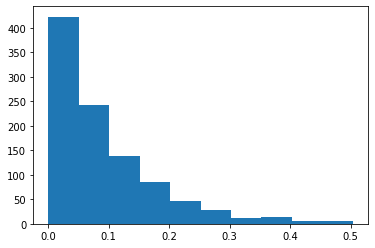

In [4]:
import matplotlib.pyplot as plt
plt.hist(data)

In [5]:
shapiro(data)

(0.8362983465194702, 7.992560368642035e-31)

In [8]:
data_scaled = StandardScaler().fit_transform(data.reshape(-1, 1))
shapiro(data_scaled)

(0.8362983465194702, 7.992560368642035e-31)

Т.е. распределение является нормальным

Проверим с выбросами

In [12]:
import numpy as np
data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)
data_scaled = StandardScaler().fit_transform(data)

Другой достаточно популярный вариант – MinMax Scaling, который переносит все точки на заданный отрезок (обычно (0, 1)).
$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$



In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [20]:
(data - data.min()) / (data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

StandartScaling и MinMax Scaling имеют похожие области применимости и часто сколько-нибудь взаимозаменимы. Впрочем, если алгоритм предполагает вычисление расстояний между точками или векторами, выбор по умолчанию – StandartScaling. Зато MinMax Scaling полезен для визуализации, чтобы перенести признаки на отрезок (0, 255).

Если мы предполагаем, что некоторые данные не распределены нормально, зато описываются логнормальным распределением, их можно легко привести к честному нормальному распределению:

In [33]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(1000)
shapiro(data)
shapiro(np.log(data))

(0.9989310503005981, 0.8355457186698914)

## Отсеивание признаков с низкой дисперсикй
Самый очевидный кандидат на отстрел – признак, у которого значение неизменно, т.е. не содержит вообще никакой информации. Если немного отойти от этого вырожденного случая, резонно предположить, что низковариативные признаки скорее хуже, чем высоковариативные. Так можно придти к идее отсекать признаки, дисперсия которых ниже определенной границы.


In [35]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

In [37]:
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [38]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

(100, 19)

In [39]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 19)

In [40]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 16)

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

In [42]:
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

In [43]:
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver='lbfgs'), x_data_generated, y_data_generated, scoring='neg_log_loss', cv=5).mean()

-0.3302293900684709

In [49]:
cross_val_score(LogisticRegression(solver='lbfgs'), x_data_kbest, y_data_generated, scoring='neg_log_loss', cv=5).mean()

-0.29292538979493704

In [50]:
cross_val_score(LogisticRegression(solver='lbfgs'), x_data_varth, y_data_generated, scoring='neg_log_loss', cv=5).mean()

-0.2968363443753928

## Отбор с использованием моделей

Другой подход: использовать какую-то baseline модель для оценки признаков, при этом модель должна явно показывать важность использованных признаков. Обычно используются два типа моделей: какая-нибудь "деревянная" композиция (например, Random Forest) или линейная модель с Lasso регуляризацией, склонной обнулять веса слабых признаков. Логика интутивно понятна: если признаки явно бесполезны в простой модели, то не надо тянуть их и в более сложную.

In [51]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [52]:
x_data_generated, y_data_generated = make_classification()

In [57]:
pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier(n_estimators =100)), LogisticRegression(solver='lbfgs'))

In [58]:
lr = LogisticRegression(solver='lbfgs')
rf = RandomForestClassifier(n_estimators =100)

print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss', cv=5).mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss', cv=5).mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss', cv=5).mean())

-0.09562447836580079
-0.17974691837331308
-0.09134088184301119


## Перебор
Наконец, самый надежный, но и самый вычислительно сложный способ основан на банальном переборе: обучаем модель на подмножестве "фичей", запоминаем результат, повторяем для разных подмножеств, сравниваем качество моделей. Такой подход называется Exhaustive Feature Selection.


Перебирать все комбинации – обычно слишком долго, так что можно пробовать уменьшить пространство перебора. Фиксируем небольшое число N, перебираем все комбинации по N признаков, выбираем лучшую комбинацию, потом перебираем комбинации из N+1 признаков так, что предыдущая лучшая комбинация признаков зафиксирована, а перебирается только новый признак. Таким образом можно перебирать, пока не упремся в максимально допустимое число признаков или пока качество модели не перестанет значимо расти. Этот алгоритм называется Sequential Feature Selection.


Этот же алгоритм можно развернуть: начинать с полного пространства признаков и выкидывать признаки по одному, пока это не портит качество модели или пока не достигнуто желаемое число признаков.